In [1]:
import os
os.chdir('/cluster/home/kruu/git/eye_tracking/')
# os.chdir('/home/kruu/git_folder/eye_tracking/')
# os.chdir('C:/Users/kruu/git_folder/eye_tracking/')

import pandas as pd
import numpy as np
from utils.data_processing import EyeTrackingProcessor

import matplotlib.pyplot as plt

In [2]:
data_path = "/store/kruu/eye_tracking"
files_list = os.listdir(data_path)
files_list = [os.path.join(data_path, file) for file in files_list]

tasks = ['Task 1', 'Task 2', 'Task 3', 'Task 4', 'Task 5', 'Task 6']
features = ['Recording timestamp', 'Gaze point X', 'Gaze point Y', 'Mouse position X', 'Mouse position Y', 'Event', 'Participant name']
interpolate_col = ['Recording timestamp', 'Gaze point X', 'Gaze point Y', 'Mouse position X', 'Mouse position Y', 'Blink']

processor = EyeTrackingProcessor()
all_data = processor.load_data(files_list)
dataset = processor.get_features(all_data, tasks, features)
dataset, blinks = processor.detect_blinks(dataset)
    

/home/kruu/git_folder/eye_tracking/utils/data_processing.py:16: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep='\t')
/home/kruu/git_folder/eye_tracking/utils/data_processing.py:16: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep='\t')


****
# Raw timeseries
****

In [11]:
task_start = all_data[0].query("Event == 'Task 1'").index[0]
task_end = all_data[0].query("Event == 'Task 1 end'").index[0]
pad = 500

task1_plot = all_data[0].loc[task_start-500:task_end+500]

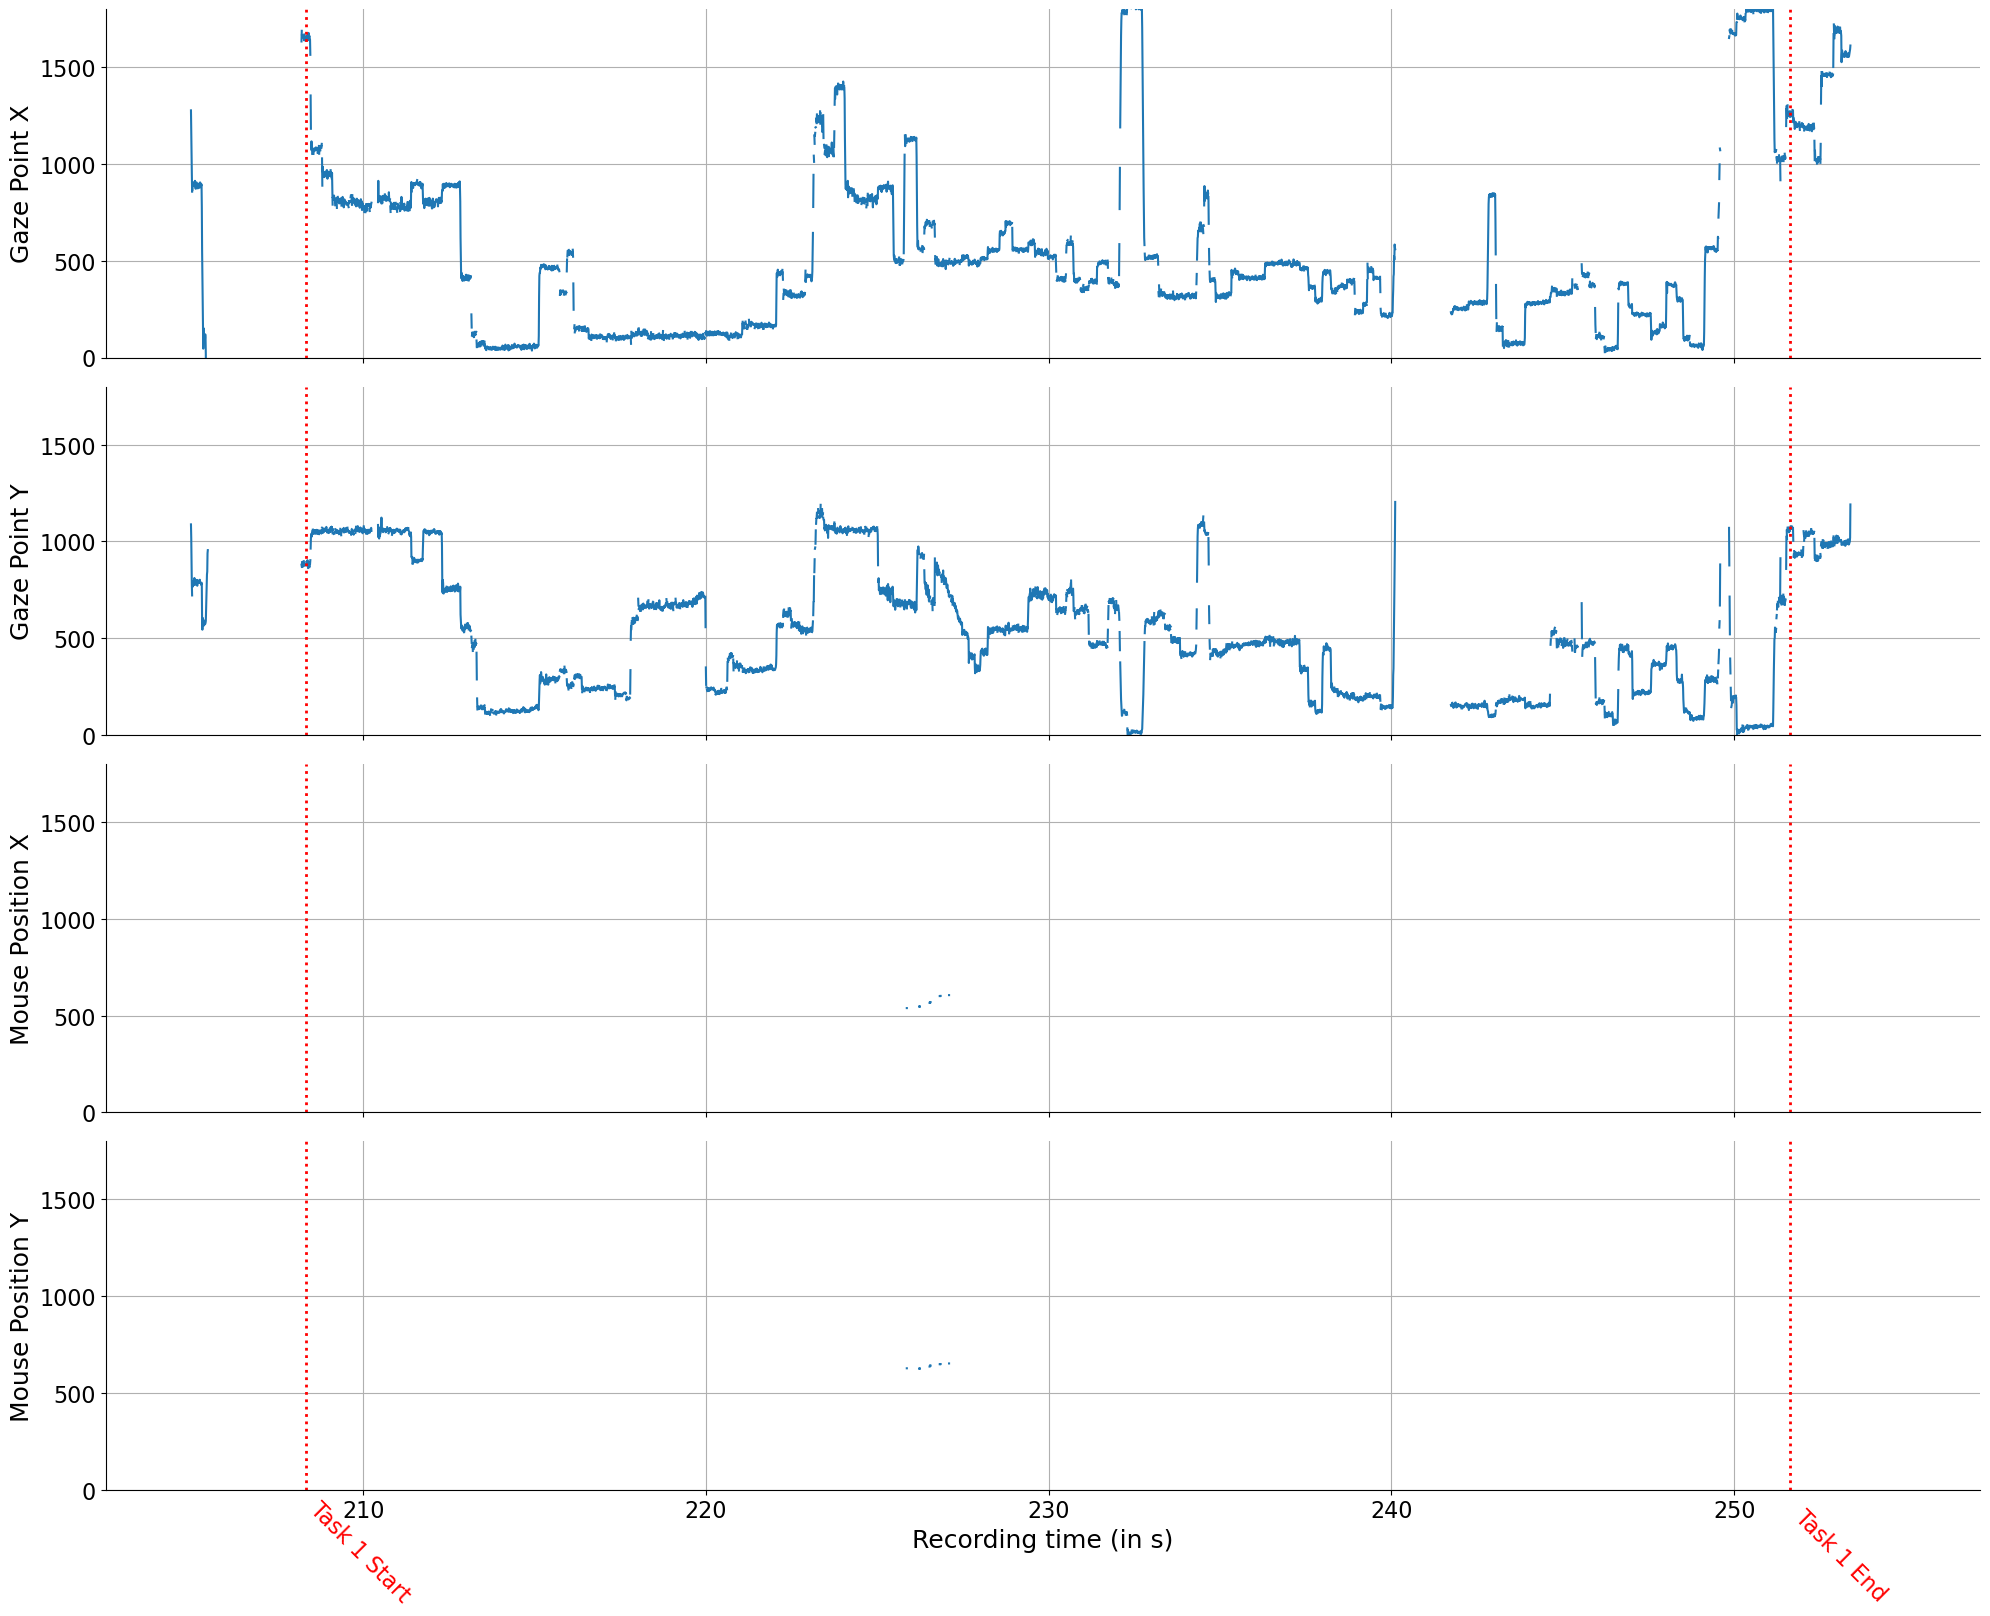

In [17]:
fig, axs = plt.subplots(4, 1, figsize=(20, 16), sharex=True)

# Convert timestamps to seconds
timestamps_sec = task1_plot["Recording timestamp"] / 1e6
start_time_sec = task1_plot.loc[task_start]["Recording timestamp"] / 1e6
end_time_sec = task1_plot.loc[task_end]["Recording timestamp"] / 1e6

# Titles for each subplot
titles = ['Gaze Point X', 'Gaze Point Y', 'Mouse Position X', 'Mouse Position Y']
data_columns = ['Gaze point X', 'Gaze point Y', 'Mouse position X', 'Mouse position Y']

# Plot each subplot
for ax, title, col in zip(axs, titles, data_columns):
    ax.plot(timestamps_sec, task1_plot[col], label=title)
    ax.axvline(x=start_time_sec, color='red', linestyle=':', linewidth=2)
    ax.axvline(x=end_time_sec, color='red', linestyle=':', linewidth=2)
    ax.set_ylim(0, 1800)
    ax.set_ylabel(title)
    ax.grid(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Add labels directly to vertical lines on the top subplot only
axs[-1].text(start_time_sec, -600, 'Task 1 Start', color='red', rotation=-45, verticalalignment='bottom', fontsize = 16)
axs[-1].text(end_time_sec, -600, 'Task 1 End', color='red', rotation=-45, verticalalignment='bottom', fontsize = 16)

# X-axis label on the last subplot
axs[-1].set_xlabel('Recording time (in s)', fontsize = 18)

for ax in axs:
    ax.tick_params(axis='both', labelsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)

plt.tight_layout()
plt.show()
